# Customer Segmentation Using Machine Learning

 **Problem Statment**

 * Many shops struggles to understand different customers behaviours , so their marketing becomes less effective. This project aims to group the customers based age, income and spending habits. By creating clear customer groups, business can give the right offers to the right people. This helps  to improve the customer engagement and increase sales.

**EDA**

In [ ]:
import numpy as np               # NumPy is used for numerical operations, arrays, mathematical functions.
import pandas as pd              # Pandas is used for loading the dataset, data cleaning, and data analysis.
import matplotlib.pyplot as plt  # Matplotlib is used to create visualizations like scatter plots, bar graphs, line graphs, etc.
import seaborn as sns           # Seaborn is a statistical data visualization library that makes plots beautiful and easy.
                                # It works on top of Matplotlib and is commonly used for heatmaps, pairplots, distributions, etc.

In [ ]:
# Reading the Mall Customers dataset from the local path
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# Shows the first 5 rows of the dataset.
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Removes the 'CustomerID' column from the dataset.
df = df.drop('CustomerID',axis=1)

In [ ]:
#This prints the list of all column names in the dataframe.
print(df.columns)

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [ ]:
#return no of rows and columns
df.shape

(200, 4)

In [ ]:
# Shows column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


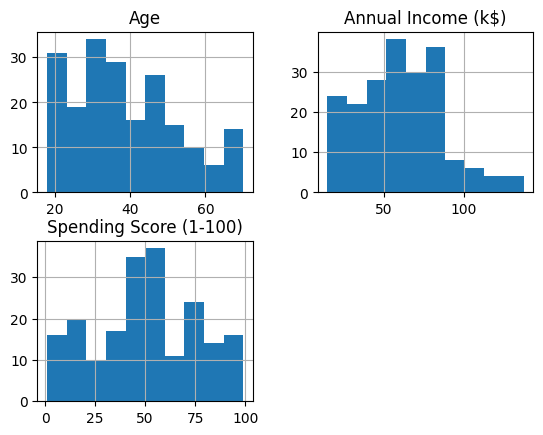

In [ ]:
# Shows distribution of each column to understand patterns and check data spread
df.hist()
plt.show()

**Observations**

 * Age → Shows how many customers belong to each age group.

 * Annual Income → Shows how customer incomes are spread (low, medium, high).

 * Spending Score → Shows how customers spend (low spenders vs high spenders).

 * Genre (Male/Female) → Bar count showing number of males and females.

In [ ]:
df.describe()
# Shows summary statistics: count, mean, min, max, and percentiles for numeric columns

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**Observations**

 1. **AGE**

 * Out of the maximum age of 70 years, 75% of customers are 49 or younger, showing most shoppers are in the younger age group.

 * Out of the same range, 50% of customers are 36 or younger, meaning half of the customers are young adults.

 * Out of this range, 25% are 28 or younger, representing a smaller group of very young shoppers.

 * The youngest customer is 18 years old.

 * The oldest customer is 70 years old.

 2. **ANNUAL INCOME**

 * Out of the maximum income of 137k$,  75% of customers earn 78k$ or less, showing most customers are middle-income earners.

 * Out of the same range, 50% earn 61.5k$ or less, meaning half of them fall in the moderate-income group.

 * Out of this range, 25% earn 41.5k$ or less, representing the lower-income segment.

 * The lowest income recorded is 15k$.

 * The highest income recorded is 137k$.

 3. **SPENDING SCORE(1-100)**

 * Out of the maximum score of 99, 75% of customers score 73 or below, showing most spend at a medium to high level.

 * Out of the same range, 50% score around 50, meaning half of the customers spend at an average level.

 * Out of this range, 25% score 34.75 or below, representing low spenders.

 * The lowest spending score is 1.

 *  The highest spending score is 99.

In [ ]:
df['Age'].value_counts()
# Counts how many times each unique age appears in the Age column

,count
Age,
32,11
35,9
31,8
19,8
30,7
49,7
23,6
40,6
36,6


In [ ]:
df['Age'].unique()
# Shows all unique age values (removes duplicates)

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
df.nunique()
# Shows how many unique values each column has in the dataset

,0
Genre,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


**Univariate Analysis**

* hist/dist/kde plots (Numerical - continous vvariables)

 * count/Bar plot(Categorical variables)

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# Selects all categorical (object/text) columns and stores them in a list

num_cols = df.select_dtypes(include=np.number).columns.tolist()
# Selects all numerical columns (int/float) and stores them in a list

In [ ]:
cat_cols
# Displays the list of categorical column names

['Genre']

In [ ]:
num_cols
# Displays the list of numerical column names

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

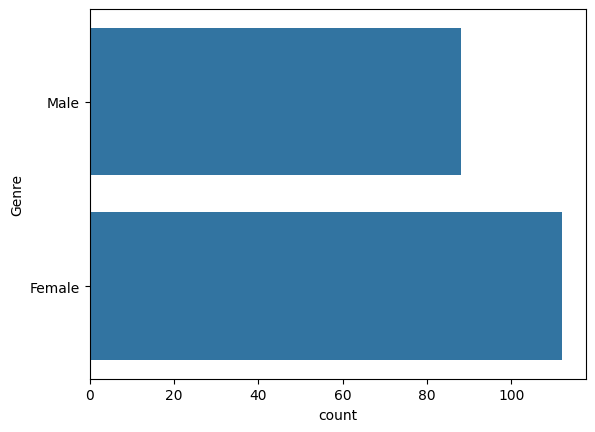

In [ ]:
sns.countplot(df['Genre'])
plt.show()
# Draws a bar chart showing count of Male vs Female customers

**Observations**

 * This graph shows how many Male and Female customers are in the dataset.

 * Each bar represents a category (Male / Female).

 * The height of the bar shows how many customers belong to that category.

 * You can easily compare which gender has more customers.

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

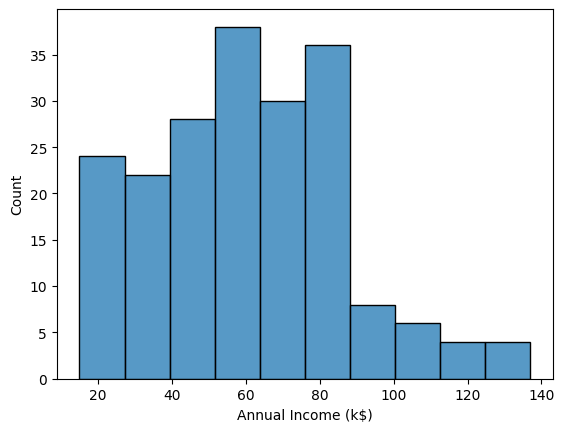

In [ ]:
sns.histplot(df['Annual Income (k$)'])
# Plots the distribution of annual income using a histogram

**Observations**

 * The graph shows how customers are spread across different income levels.

 * Most customers have an income between 40k and 80k — these bars are the tallest.

 * Very few customers earn above 100k$, which is why the bars on the right side are shorter.

 * A small number of customers also fall below 30k$ income.

 * Overall, the income distribution is concentrated in the middle range, with fewer customers in the very high or very low income groups.



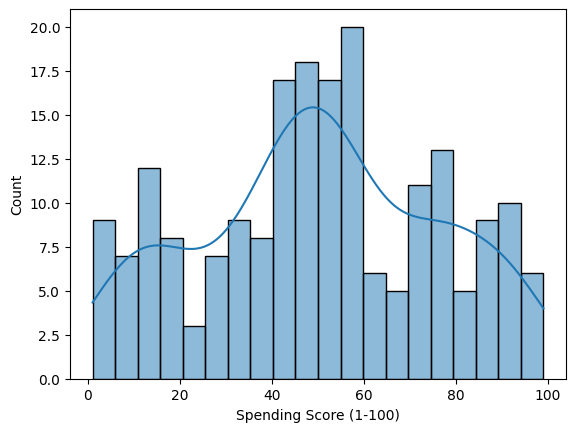

In [ ]:
sns.histplot(df, x='Spending Score (1-100)', kde=True, bins=20)
plt.show()
# Shows spending score distribution with a smooth curve

**Observations**

 * This graph shows how customers are spread across different spending levels from 1 to 100.

 * Most customers fall between 40 and 70, which means many people spend at a medium level.

 * A small number of customers have very low scores (0–20) — these customers spend very little.

 * Some customers have very high scores (80–100) — these are the top spenders.

 * The curve (KDE) shows the overall shape, and it peaks around 50–60, meaning that is the most common spending range.

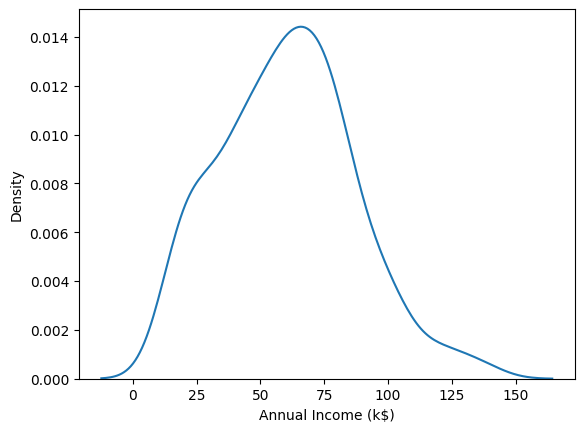

In [ ]:
sns.kdeplot(df['Annual Income (k$)'])
plt.show()
# Shows the smooth income distribution curve

**Observations**

* This curve shows how customer incomes are spread out smoothly across different income levels.

 * The peak around 60k–70k means most customers earn in this range.

 * The curve slowly drops after 80k, showing fewer high-income customers.

 * It also stays low below 20k, meaning very few customers earn at the low-income end.

 * Overall, the KDE graph tells us that the income distribution is centered mostly around the middle-income range

**Bivariate Analysis**

Scatter plots (continuous vs continuous)

Box plots(for categorical vs continuous)

In [ ]:
cat_cols
# Displays the list of categorical column names

['Genre']

In [ ]:
num_cols
# Displays the list of numerical column names

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

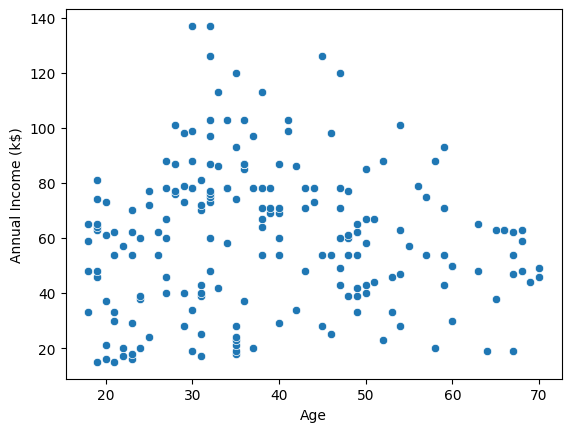

In [ ]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')
plt.show()
# Shows relationship between age and income

**Obserations**

*  Each dot represents a single customer.

 * The dots are spread out in all directions, meaning age does not directly affect income in this dataset.

 * Young customers (20–30 years) and older customers (40–60 years) both have mixed income levels.

 * There is no clear upward or downward trend, so income is randomly distributed across all age groups.

 * This shows that customers of any age can have low, medium, or high income.

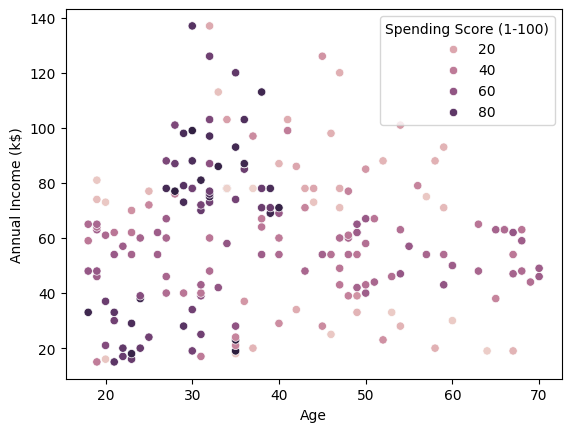

In [ ]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Spending Score (1-100)')
plt.show()
# Age vs income colored by spending score

**Observations**

 * Each dot represents a customer plotted by Age (x-axis) and Annual Income (y-axis).

 * The color of each dot shows the customer's Spending Score:

 * Light color = Low spending

 * Dark color = High spending

 *  Customers of every age group have a mix of low, medium, and high spending scores.

 * There is no strong relationship between age and income — incomes vary across all ages.

 * High spenders (dark dots) are seen mostly in the middle-income ranges (40k–80k).

 * Low spenders (light dots) appear across all age and income levels.

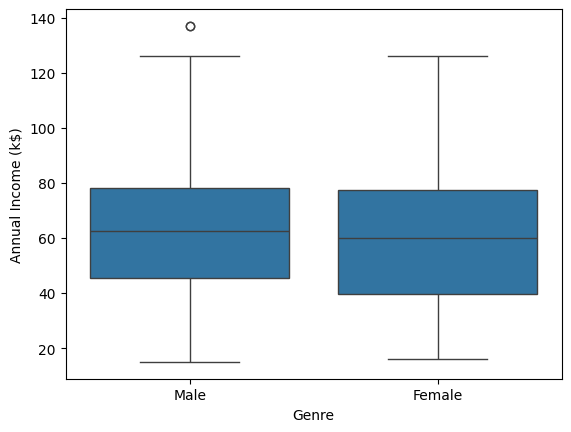

In [ ]:
sns.boxplot(data=df, x='Genre', y='Annual Income (k$)')
plt.show()
# Compares income distribution between males and females

**Observations**

* The boxplot compares the annual income of Male and Female customers.

 * Both Male and Female groups have almost the same income range.

 * The median income (middle line) is also very close for both genders.

 * The boxes are of similar size, meaning the income variation is similar in both groups.

 * There is one outlier in the Male group (a very high income point), shown as a dot.

 * Overall, gender does not have a major impact on annual income in this dataset.

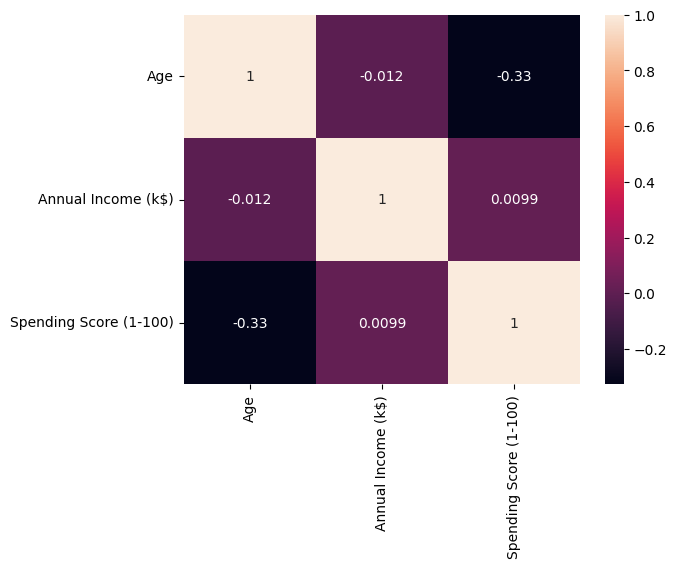

In [ ]:
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()
# Shows correlation between all numerical features

**Observations**

 * This heatmap shows how strongly the numerical variables are related to each other.

 * Correlation values range from -1 to +1:

 * +1 → Strong positive relationship

 * -1 → Strong negative relationship

 * 0 → No relationship

**Mutlivariate Analysis**

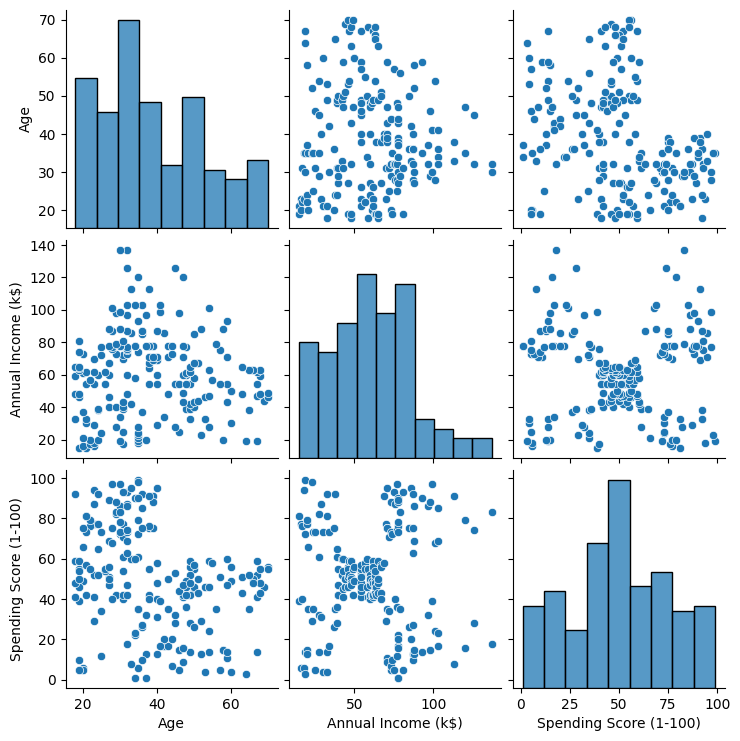

In [ ]:
sns.pairplot(df)
plt.show()
# Shows pairwise relationships between all numeric features

**Observations**

* The pairplot shows that age, income, and spending score have no strong linear relationships with each other.

 * Age vs Spending Score shows a slight downward pattern, meaning older customers tend to spend less.

 * Income vs Spending Score reveals clear groupings, which is useful for clustering.

 * All histograms show wide variation, indicating diverse customer behaviors.

 * Overall, the dataset contains distinct patterns that are ideal for customer segmentation.

 **Pre-processing**

In [ ]:
df.isnull()
# Returns True for missing values and False for non-missing values

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [ ]:
df.isnull().sum()/len(df)*100
# Shows the percentage of missing values in each column

,0
Genre,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


In [ ]:
df.columns
# Displays all column names in the dataset

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
df['Genre'] = df['Genre'].map({'Male':0, 'Female':1})
 # Converts Genre column into numbers: Male=0, Female=1

In [ ]:
df.head()
# Displays the first five rows of the updated (preprocessed) dataset

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


**Model Building**

In [ ]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
# Selecting the feature columns (Annual Income & Spending Score) for model input

In [ ]:
print(x)
# Prints all the values of the selected feature columns

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler   # Imports StandardScaler for data normalization
scaler = StandardScaler()                          # Creates scaler object to standardize numerical features

In [ ]:
X_scaled = scaler.fit_transform(x)
# Scales the features to mean=0 and std=1 (standardization)

In [ ]:
from sklearn.cluster import KMeans
# Imports the KMeans algorithm for creating customer clusters

In [ ]:
kmeans = KMeans()     # Creates a KMeans model object with default settings
kmeans                # Displays the KMeans model details
                      # no of cluster = 8

KMeans()

In [ ]:
kmeans.fit(X_scaled)
# Fits (trains) the KMeans model on the standardized income and spending score data

KMeans()

In [ ]:
kmeans.predict(X_scaled)
# Returns the cluster number assigned to each customer

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 5, 1, 1, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 0, 2, 5, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 6, 2, 6, 2, 6, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7], dtype=int32)

**Elbow  Method for optimal cluster**

By random ini of kmeans it is classifying entire dataset into 8 no of clusters

In [ ]:
wcss =[]
for i in range(1,11):
 kmeans = KMeans(n_clusters = i, init= 'k-means++', random_state=42)
 kmeans.fit(X_scaled)
 wcss.append(kmeans.inertia_)

 * init=K-means the centroids are very far way from each other ... To aviod the poor cluustering results caused by bad random centroids initialisation.

* inertia_gives thr distance between centroid and all other points with inn a cluster

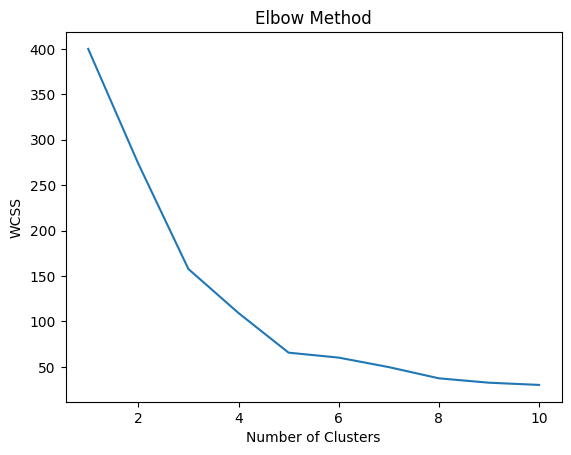

In [ ]:
plt.plot(range(1, 11), wcss)        # Plots WCSS values for cluster numbers 1 to 10
plt.title("Elbow Method")           # Title of the graph
plt.xlabel("Number of Clusters")    # X-axis label
plt.ylabel("WCSS")                  # Y-axis label (Within-Cluster Sum of Squares)
plt.show()                          # Displays the elbow plot

**Observations**


 * The graph shows how WCSS (Within Cluster Sum of Squares) decreases as the number of clusters increases.

 * From k = 1 to k = 3, WCSS drops sharply — meaning more clusters give much better grouping.

 * After k = 5, the line becomes almost flat — adding more clusters does not improve the model much.

 * This bending point (the “elbow”) appears around k = 5.

 * Therefore, the optimal number of clusters is 5.

**Model Training**

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# Creates a KMeans model with 5 clusters using k-means++ initialization for stable and accurate results

Retraining the model from optimised elbow plot

In [ ]:
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Trains kmeans and assigns a cluster label to each row, storing it in a new 'Cluster' column

Finding the each point belongs to which cluster assignement and then craeted new feature called cluster.

In [ ]:
df.head()
# Shows the first 5 rows of the dataframe, including the newly added 'Cluster' column

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,4
1,0,21,15,81,2
2,1,20,16,6,4
3,1,23,16,77,2
4,1,31,17,40,4


In [ ]:
labels = kmeans.labels_   # Gets the cluster label assigned to each data point after KMeans training
labels                    # Displays the list of cluster labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Retrained model with updated cluster assignment ...5 clusters we found optimal

**Visualise cluster**

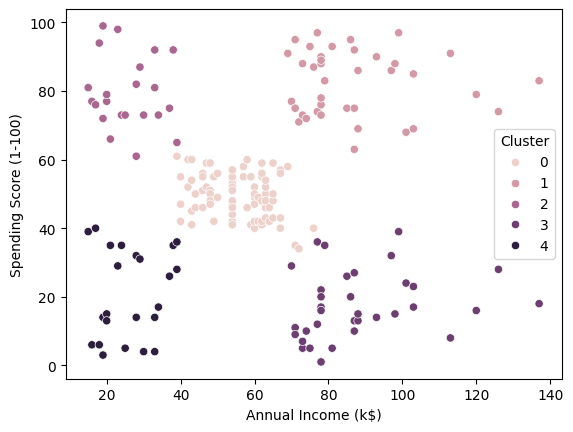

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')     # Visualizes customer clusters based on income and spending score
plt.show()                                                                                      # Displays the scatter plot

**Observations**

 1. Cluster 0 --> Average Income, Average Spending

 * Customers in the middle area

 * Moderate income and moderate spending

 *  Typical/regular shoppers

 2. Cluster 1 --> High Income, High Spending (Premium Customers)

 * Top spenders

 * High purchasing power

 * Very valuable for targeted marketing

 3. Cluster 2 -->  Low Income, High Spending (Enthusiastic Shoppers)

 * Spend a lot despite low income

 * Good for discount-based promotions

 4. Cluster 3 -->  Low Income, Low Spending (Budget Customers)

 * Limited income and limited spending

 * Price-sensitive group

 5. Cluster 4 --> High Income, Low Spending (Careful Spenders)

 * High earners but spend very little

 * Need loyalty programs or attractive offers to convert

In [ ]:
df.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
# Shows the average Age, Income, and Spending Score for each customer cluster

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


**Observations**

Cluster 0: Older customer with modern icome and averages spending behaviour.

cluster 1: young adults with high income and high spendig ---likely premium customers.

cluster 2: very young , low-income customers who spends  heavily --- potential impulsive buyers.

cluster 3: young, high income customers with less spending ---budget conscious group.

cluster 4: older, min income with low spending --- potential to upsell


**Performance Evaluation**

In [ ]:
from sklearn.metrics import silhouette_score
# Imports the Silhouette Score metric to evaluate clustering quality

In [ ]:
silhouette = silhouette_score(X_scaled, labels)
# Calculates how well the data points fit within their clusters (score between -1 and 1)

In [ ]:
print(silhouette)
# Displays the silhouette score value

0.5546571631111091


* A silhouette score of 0.55 shows that the clusters are well-separated and the customers fit naturally into their groups. This means the K-Means model has formed clear and meaningful customer segments.

**Conclusion**

 * The k-means clustering model sucessfully divided customers into five meaning full groups based on age, income and spending score. The siilhoutte score of 0.55 shows that the clusters are well-formed and clearly seperated. This ssegmentation architecture helps in unnderstanding different customers behaviours and supports targeted marketing

**Business Insights**

 * Premium customers(cluster 1) should be retained with exclusive benefits.

 * Impulsive Buyers(cluster 2) can boost short-term sales through aggressive camapinings

**Final summary**

* The customer segmentation model provides the clear understanding of different customers groups and their purchasing patterns. These insights help in designing targeted marketing stratagies, improving customer satisfication and ultimately increasing business profitability.